## Modifying triggers/events in EEG data

This notebook provides an example of how to use the `add_trigger` function from the `utils.py` file. 

In [7]:
import mne
from utils import add_trigger
import os

In [17]:
# reading the file & loading in the data
sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = os.path.join(sample_data_folder, 'MEG', 'sample',
                                    'sample_audvis_raw.fif')
raw = mne.io.read_raw_fif(sample_data_raw_file) # raw is an MNE object that contains the data of the class Raw

raw.load_data()

Opening raw data file /Users/laurapaulsen/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Reading 0 ... 166799  =      0.000 ...   277.714 secs...


<Raw | sample_audvis_raw.fif, 376 x 166800 (277.7 s), ~481.8 MB, data loaded>

An array of the events is extracted.

In [18]:
events = mne.find_events(raw, stim_channel='STI 014')
print(events)

320 events found
Event IDs: [ 1  2  3  4  5 32]
[[ 27977      0      2]
 [ 28345      0      3]
 [ 28771      0      1]
 [ 29219      0      4]
 [ 29652      0      2]
 [ 30025      0      3]
 [ 30450      0      1]
 [ 30839      0      4]
 [ 31240      0      2]
 [ 31665      0      3]
 [ 32101      0      1]
 [ 32519      0      4]
 [ 32935      0      2]
 [ 33325      0      3]
 [ 33712      0      1]
 [ 34089      0      5]
 [ 34532      0      2]
 [ 34649      0     32]
 [ 34956      0      3]
 [ 35428      0      1]
 [ 35850      0      4]
 [ 36211      0      2]
 [ 36576      0      3]
 [ 37007      0      1]
 [ 37460      0      4]
 [ 37910      0      2]
 [ 38326      0      3]
 [ 38711      0      1]
 [ 39130      0      4]
 [ 39563      0      2]
 [ 39926      0      3]
 [ 40405      0      1]
 [ 40880      0      4]
 [ 41260      0      2]
 [ 41646      0      3]
 [ 42126      0      1]
 [ 42598      0      5]
 [ 42938      0     32]
 [ 42960      0      2]
 [ 43346      0 

As you can see above the first column is the time stamp in EEG samples, and the third column contains the event id. The second column is the event value, which is not used in this example.

### Adding a trigger
Now lets pretend we want to add a trigger 0.1 seconds after the first trigger with the trigger code 100. We can do this by adding a new row to the events array. The `add_trigger` function from the `utils.py` script provided can be used for this purpose.

The add_trigger function takes the following arguments:

* trigger_list(np.array): The current trigger list (`events` in this case)
* trigger_code(int): The trigger code for the new trigger (100 in this example)
* sample(int): The sample number for the new trigger event


In [10]:
# find the sample number for the first trigger
first_trigger_sample = events[0, 0]

# get the sample rate
sample_rate = raw.info['sfreq']

# difference in samples between the first trigger and the trigger we want to add
samples_in_0_1_seconds = int(0.1 * sample_rate) # samples can only be integers, not floats

# add a trigger 0.1 seconds after the first trigger
events = add_trigger(events, 100, first_trigger_sample + samples_in_0_1_seconds)

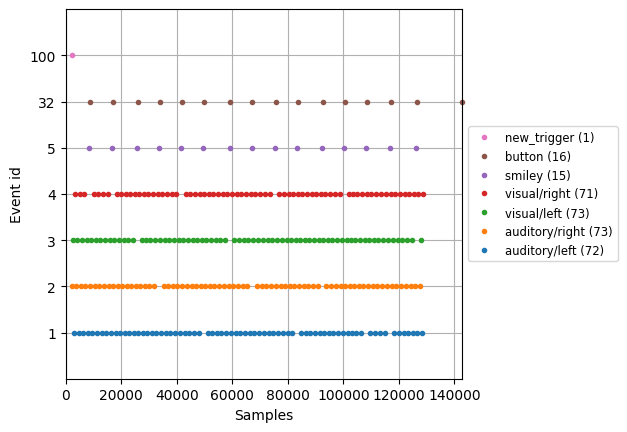

In [11]:
# CHECKING THAT THE TRIGGER WAS ADDED
# Creating a dictionary with event ids
event_id = {'auditory/left': 1,
              'auditory/right': 2,
              'visual/left': 3,
              'visual/right': 4,
              'smiley': 5,
              'button': 32,
              'new_trigger': 100}

mne.viz.plot_events(events, first_samp=raw.first_samp, event_id=event_id);

It worked! cool! Now we can epoch based on this updated events array.

In [12]:
epochs = mne.Epochs(raw, events, event_id, tmin=-0.2, tmax=0.5, preload=True)

Not setting metadata
321 matching events found
Setting baseline interval to [-0.19979521315838786, 0.0] sec
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 3)
3 projection items activated
Using data from preloaded Raw for 321 events and 421 original time points ...


/var/folders/6v/9wx2wvns3pzd3h_jgjzm673r0000gn/T/ipykernel_31052/953485534.py:1: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, events, event_id, tmin=-0.2, tmax=0.5, preload=True)


0 bad epochs dropped


## A more complicated example (this goes out to group 9) <33

Lets pretend everytime the trigger 5 was recorded we would like to add 3 triggers with the trigger codes 101, 102, and 103 after respectively 0.1, 0.2, and 0.3 seconds after the trigger code 5.

In [13]:
sample_rate = raw.info['sfreq']

# find all the triggers with the code 1
triggers_with_code_1 = events[events[:, 2] == 5]

# get all the sample numbers for the triggers with the code 5
trigger_samples = triggers_with_code_1[:, 0]

# now lets iterate over all the trigger samples with the code 5 and add the three new triggers after each of them
for trigger_sample in trigger_samples:
    events = add_trigger(events, 101, trigger_sample + int(0.1 * sample_rate))
    events = add_trigger(events, 102, trigger_sample + int(0.2 * sample_rate))
    events = add_trigger(events, 103, trigger_sample + int(0.3 * sample_rate))

In [42]:
# New chunk group 9!! 
# modify this code to add a trigger 0.5 seconds after each trigger, with the trigger code depending on the original trigger code

print(events.shape)
for event in events: # looping over the original
    sample  =  event[0] + 1000 * 0.5
    if event[2] == 1:
        trigger_code = 10
        events = add_trigger(events, trigger_code, sample)

    elif event[2] == 2:
        trigger_code = 20
        events = add_trigger(events, trigger_code, sample)

print(events.shape)

(44440, 3)
(44585, 3)


Let's plot it to check!

/var/folders/6v/9wx2wvns3pzd3h_jgjzm673r0000gn/T/ipykernel_31052/768857974.py:6: RuntimeWarning: event 1 missing from event_id will be ignored
  mne.viz.plot_events(events, first_samp=raw.first_samp, event_id=event_id);
/var/folders/6v/9wx2wvns3pzd3h_jgjzm673r0000gn/T/ipykernel_31052/768857974.py:6: RuntimeWarning: event 2 missing from event_id will be ignored
  mne.viz.plot_events(events, first_samp=raw.first_samp, event_id=event_id);
/var/folders/6v/9wx2wvns3pzd3h_jgjzm673r0000gn/T/ipykernel_31052/768857974.py:6: RuntimeWarning: event 3 missing from event_id will be ignored
  mne.viz.plot_events(events, first_samp=raw.first_samp, event_id=event_id);
/var/folders/6v/9wx2wvns3pzd3h_jgjzm673r0000gn/T/ipykernel_31052/768857974.py:6: RuntimeWarning: event 4 missing from event_id will be ignored
  mne.viz.plot_events(events, first_samp=raw.first_samp, event_id=event_id);
/var/folders/6v/9wx2wvns3pzd3h_jgjzm673r0000gn/T/ipykernel_31052/768857974.py:6: RuntimeWarning: event 32 missing from e

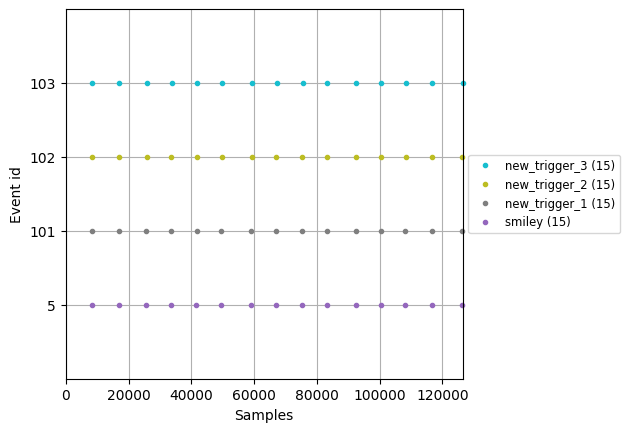

In [14]:
event_id = {'smiley': 5,
            'new_trigger_1': 101,
            'new_trigger_2': 102,
            'new_trigger_3': 103}

mne.viz.plot_events(events, first_samp=raw.first_samp, event_id=event_id);